In [1]:
import pickle
import pandas as pd
import geopandas as gpd 

In [2]:
with open("best.p","rb") as f:
    data = pickle.load(f)


In [3]:
data.keys()

dict_keys(['actor_critic_dict', 'loss_iter', 'best_rewards', 'best_plans', 'current_rewards', 'current_plans', 'iteration'])

In [4]:
gdf = data["best_plans"][0]["gdf"]

In [5]:
NON_BLOCK_LAND_USE = (
    'outside',
    'feasible',
    'road',
    'boundary'
)

BLOCK_LAND_USE = (
    'residential',
    'business',
    'wastemgmt',
    'green_l',
    'green_s',
    'school',
    'hospital_l',
    'hospital_s',
    'recreation',
    'office',
    'intersection'
)

LAND_USE = (
    NON_BLOCK_LAND_USE + BLOCK_LAND_USE)

OUTSIDE = 0
FEASIBLE = 1
ROAD = 2
BOUNDARY = 3
RESIDENTIAL = 4
BUSINESS = 5
WASTEMGMT = 6
GREEN_L = 7
GREEN_S = 8
SCHOOL = 9
HOSPITAL_L = 10
HOSPITAL_S = 11
RECREATION = 12
OFFICE = 13
INTERSECTION = 14

LAND_USE_ID = (
    OUTSIDE,
    FEASIBLE,
    ROAD,
    BOUNDARY,
    RESIDENTIAL,
    BUSINESS,
    WASTEMGMT,
    GREEN_L,
    GREEN_S,
    SCHOOL,
    HOSPITAL_L,
    HOSPITAL_S,
    RECREATION,
    OFFICE,
    INTERSECTION,
)

NUM_TYPES = len(LAND_USE_ID)

LAND_USE_ID_MAP = dict(
    zip(LAND_USE, LAND_USE_ID))

LAND_USE_ID_MAP_INV = dict(
    zip(LAND_USE_ID, LAND_USE))


PUBLIC_SERVICES_ID = (
    BUSINESS,
    WASTEMGMT,
    SCHOOL,
    (HOSPITAL_L, HOSPITAL_S),
    RECREATION,
    OFFICE
)

PUBLIC_SERVICES = (
    'shopping',
    'wastemgmt',
    'education',
    'medical care',
    'entertainment',
    'office'

)

GREEN_ID = (
    GREEN_L,
    GREEN_S
)
GREEN_AREA_THRESHOLD = 2000

TYPE_COLOR_MAP = {
    'boundary': 'lightgreen',
    'business': 'fuchsia',
    'feasible': 'white',
    'green_l': 'green',
    'green_s': 'lightgreen',
    'hospital_l': 'blue',
    'hospital_s': 'cyan',
    'wastemgmt': 'gold',
    'outside': 'black',
    'residential': 'yellow',
    'road': 'red',
    'school': 'darkorange',
    'recreation': 'lavender',
    'office' : 'red'
}


In [6]:
gdf["type"].unique()

array([ 2, 14,  4,  1,  8,  7, 10,  3,  9, 11, 12,  6,  5, 13])

In [7]:
!ls

best.p                           iteration_0009.p
best_reward4.32_iteration_0001.p iteration_0010.p
best_reward4.57_iteration_0007.p iteration_0011.p
bleh copy.ipynb                  iteration_0012.p
iteration_0001.p                 iteration_0013.p
iteration_0002.p                 iteration_0014.p
iteration_0003.p                 iteration_0015.p
iteration_0004.p                 iteration_0016.p
iteration_0005.p                 iteration_0017.p
iteration_0006.p                 iteration_0018.p
iteration_0007.p                 iteration_0019.p
iteration_0008.p                 iteration_0020.p


In [8]:
gdf["type_leg"] = gdf["type"].map(lambda x:LAND_USE_ID_MAP_INV[x])

<Axes: >

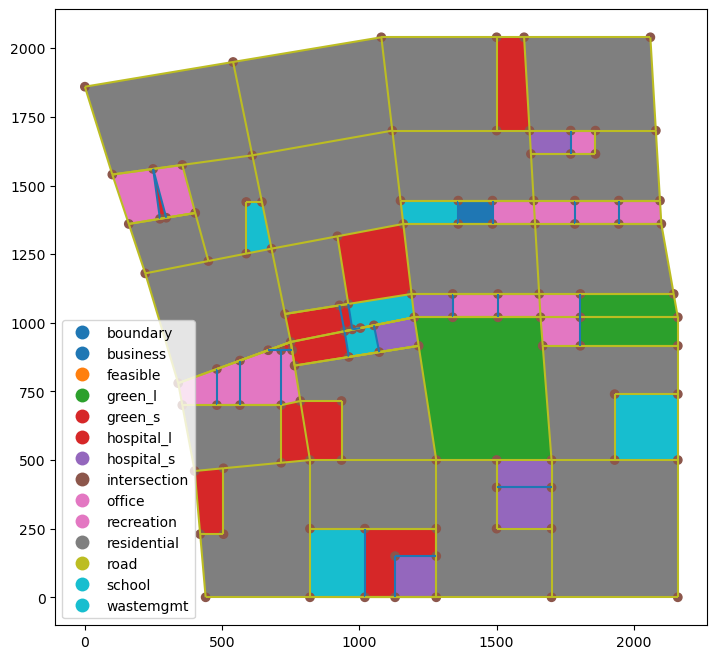

In [9]:
gdf.plot(column="type_leg",legend=True,figsize=(12, 8))

In [10]:
gdf["type_leg"].unique()

array(['road', 'intersection', 'residential', 'feasible', 'green_s',
       'green_l', 'hospital_l', 'boundary', 'school', 'hospital_s',
       'recreation', 'wastemgmt', 'business', 'office'], dtype=object)

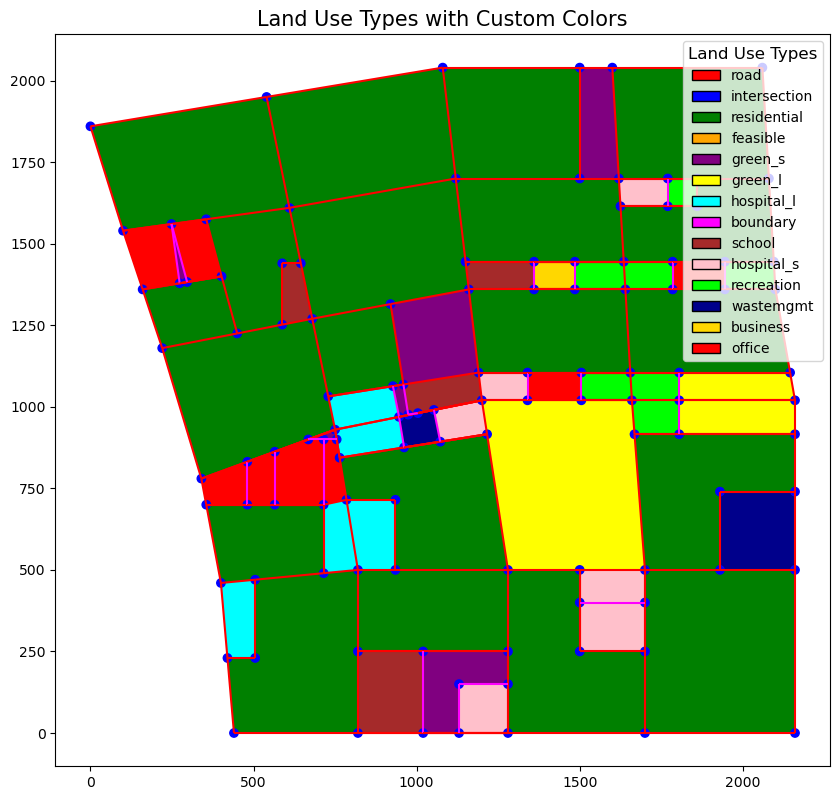

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Define distinct and contrasting colors manually
custom_colors = [
    'red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 
    'magenta', 'brown', 'pink', 'lime', 'darkblue', 'gold','red'
]

# Get the unique types
unique_types = gdf["type_leg"].unique()

# Create a dictionary that maps each unique type to a distinct color
type_color_map = dict(zip(unique_types, custom_colors))

# Assign colors to the GeoDataFrame based on the type_leg column
gdf["color"] = gdf["type_leg"].map(type_color_map)

# Plotting the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Use the assigned colors from the 'color' column
gdf.plot(ax=ax, color=gdf["color"])

# Create legend patches
legend_patches = [Patch(facecolor=color, edgecolor='black', label=land_use_type) 
                  for land_use_type, color in type_color_map.items()]

# Add legend to the plot
ax.legend(handles=legend_patches, title="Land Use Types", loc='upper right', fontsize=10, title_fontsize=12)

# Set plot title and show the plot
ax.set_title("Land Use Types with Custom Colors", fontsize=15)
plt.show()
